In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Membaca dataset
df = pd.read_csv("../data iris.csv", delimiter=";")
# X = df.drop(columns=["class"]).to_numpy()
# X
df.columns = df['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

KeyError: ('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [4]:
# Class Kmeans
class Kmeans:
    def __init__(self, max_iter=100, n_cluster=2, min_diff=0.00001):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.min_diff = min_diff
        self.centroids = None
        self.inertia = 0
        self.labels_ = None

    @staticmethod
    def euclidean_distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2)**2, axis=1))

    def fit(self, X):
        np.random.seed(42)
        self.centroids = np.random.uniform(
            np.amin(X, axis=0), np.amax(X, axis=0), size=(self.n_cluster, X.shape[1])
        )
        for iteration in range(self.max_iter):
            labels = []
            for item in X:
                distances = self.euclidean_distance(item, self.centroids)
                labels.append(np.argmin(distances))
            labels = np.array(labels)
            new_centroids = []
            for i in range(self.n_cluster):
                cluster_points = X[labels == i]
                if len(cluster_points) == 0:
                    new_centroids.append(self.centroids[i])
                else:
                    new_centroids.append(cluster_points.mean(axis=0))
            new_centroids = np.array(new_centroids)
            if np.max(np.abs(new_centroids - self.centroids)) < self.min_diff:
                break
            self.centroids = new_centroids
        self.labels_ = labels

In [11]:
# Inisialisasi dan jalankan KMeans
kmeans = Kmeans(max_iter=100, n_cluster=3, min_diff=1e-4)
# kmeans.fit(X)
kmeans.fit(df[['sepal_length', 'petal_length']].values)

In [12]:
# Menambahkan hasil label ke dataset
df["Cluster"] = kmeans.labels_


In [14]:
# Hasil clustering manual
labels_manual = kmeans.predict(df[['sepal_length', 'petal_length']].values)
centroids_manual = kmeans.centroids

AttributeError: 'Kmeans' object has no attribute 'predict'

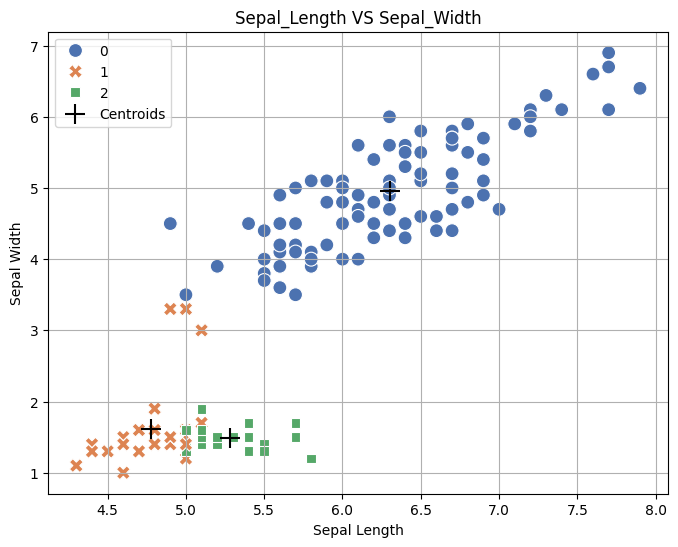

In [13]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df.iloc[:, 0],
    y=df.iloc[:, 2],
    hue=df["Cluster"],
    palette="deep",
    style=df["Cluster"],
    s=100,
)
plt.scatter(
    kmeans.centroids[:, 0],
    kmeans.centroids[:, 2],
    color="black",
    marker="+",
    s=200,
    label="Centroids",
)
plt.title("Sepal_Length VS Sepal_Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.grid(True)

# Atur batas sumbu mulai dari 0
# plt.xlim(0, None)  # Sumbu x mulai dari 0
# plt.ylim(0, None)  # Sumbu y mulai dari 0

plt.show()